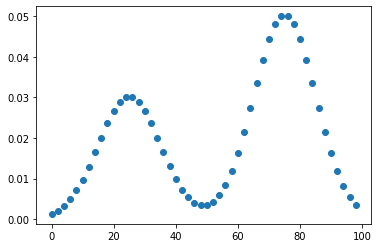

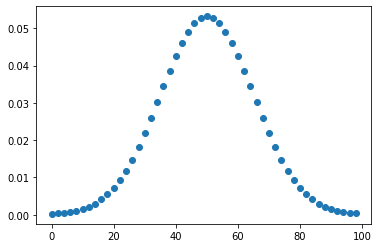

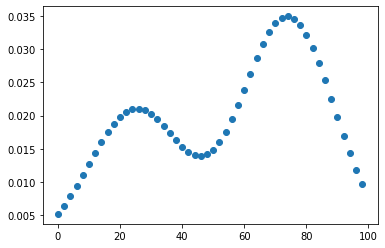

In [1]:
import numpy as np

import matplotlib.pyplot as plt

def softmax(x):

    y = np.exp(x - np.max(x))
    f_x = y / np.sum(np.exp(x))
    return f_x

class TwoNomal():
    def __init__(self,mu1,mu2,sigma1,sigma2):
        self.mu1 = mu1
        self.sigma1 = sigma1
        self.mu2 = mu2
        self.sigma2 = sigma2
    def doubledensity(self,x):
            mu1 = self.mu1
            sigma1 = self.sigma1
            mu2 = self.mu2
            sigma2 = self.sigma1
            N1 = np.sqrt(2 * np.pi * np.power(sigma1, 2))
            fac1 = np.power(x - mu1, 2) / np.power(sigma1, 2)
            density1=np.exp(-fac1/2)/N1

            N2 = np.sqrt(2 * np.pi * np.power(sigma2, 2))
            fac2 = np.power(x - mu2, 2) / np.power(sigma2, 2)
            density2=np.exp(-fac2/2)/N2
            #print(density1,density2)
            density=0.5*density2+0.3*density1
            return density


N2 = TwoNomal(25,75,10,10)
N3 = TwoNomal(50,50,15,20)
N4 = TwoNomal(25,74,15,15)

#创建等差数列作为X
X = np.arange(0,100,2)
#print(X)
Y = N2.doubledensity(X)

# Y += 0.0005*np.random.rand(50)
Y = Y/sum(Y)

Y1 = N3.doubledensity(X)

# Y1 += 0.0005*np.random.rand(50)
Y1 = Y1/sum(Y1)

Y2 = N4.doubledensity(X)

# Y2 += 0.0005*np.random.rand(50)
Y2 = Y2/sum(Y2)

#print(Y)
plt.scatter(X,Y)

plt.show()

plt.scatter(X,Y1)

plt.show()

plt.scatter(X,Y2)

plt.show()

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import copy
from tqdm import tqdm, trange

torch.manual_seed(1)
class FR_KL(nn.Module):
    def __init__(self, k):
        super(FR_KL, self).__init__()
        self.q = nn.Parameter(torch.rand(k).to(float))
        torch.unsqueeze(self.q, 0)
#         self.q = nn.Parameter(torch.tensor([[-2.1,-4.2,-3.6,-2.0],[-5.3,-3.0,-4.1,-2.1]]))
        
    def set_q(self, q_bake):
        self.q = nn.Parameter(copy.deepcopy(q_bake))

    def forward(self, p, f):
        # forward 
        if f=="f":
            qq = F.log_softmax(self.q, dim=-1)
            return F.kl_div(qq,p.log(),log_target=True,reduction="batchmean") 
        elif f=="r": #reverse
            qq = F.log_softmax(self.q, dim=-1)
            return F.kl_div(p.log(),qq,log_target=True, reduction="batchmean") 
        elif f=="fr": #reverse
            qq = F.log_softmax(self.q, dim=-1)
            return 0.5*F.kl_div(qq,p.log(),log_target=True,reduction="batchmean") +0.5*F.kl_div(p.log(),qq,log_target=True, reduction="batchmean") 
    

def learn(p, flag, N=1):
    optimizer = optim.Adam(A.parameters(), lr=0.1)#, weight_decay=0.1)
    result = []
    for i in trange(N):
        loss = A(p,flag)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        result.append(loss.item())
    del optimizer
    return result

# class_K = 1000
# p = (torch.rand((128, class_K))*2-1)
# p = nn.Parameter(torch.tensor([[-1.4,-3.0,-2.2,-4.0],[-1.4,-3.0,-2.4,-1.2]]))

p = nn.Parameter(torch.from_numpy(Y)).to(float)
torch.unsqueeze(p, 0)
p.requires_grad = False

A = FR_KL(p.size()[-1])

q = copy.deepcopy(A.q)
print(q)
p1 = copy.deepcopy(p)
p2 = copy.deepcopy(p)
p3 = copy.deepcopy(p)


res1=learn(p1, "f")
q1 = F.softmax(A.q).detach().numpy()

A.set_q(q)

res2=learn(p2, "r")
q2 = F.softmax(A.q).detach().numpy()

A.set_q(q)

# repeat
p = nn.Parameter(torch.from_numpy(Y1)).to(float)
torch.unsqueeze(p, 0)
p.requires_grad = False

A = FR_KL(p.size()[-1])

q = copy.deepcopy(A.q)
print(q)
p1 = copy.deepcopy(p)
p2 = copy.deepcopy(p)
p3 = copy.deepcopy(p)


res1=learn(p1, "f")
q4 = F.softmax(A.q).detach().numpy()

A.set_q(q)

res2=learn(p2, "r")
q5 = F.softmax(A.q).detach().numpy()

A.set_q(q)


# repeat
p = nn.Parameter(torch.from_numpy(Y2)).to(float)
torch.unsqueeze(p, 0)
p.requires_grad = False

A = FR_KL(p.size()[-1])

q = copy.deepcopy(A.q)
print(q)
p1 = copy.deepcopy(p)
p2 = copy.deepcopy(p)
p3 = copy.deepcopy(p)


res1=learn(p1, "f")
q7 = F.softmax(A.q).detach().numpy()

A.set_q(q)

res2=learn(p2, "r")
q8 = F.softmax(A.q).detach().numpy()

A.set_q(q)




Parameter containing:
tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999, 0.3971, 0.7544, 0.5695,
        0.4388, 0.6387, 0.5247, 0.6826, 0.3051, 0.4635, 0.4550, 0.5725, 0.4980,
        0.9371, 0.6556, 0.3138, 0.1980, 0.4162, 0.2843, 0.3398, 0.5239, 0.7981,
        0.7718, 0.0112, 0.8100, 0.6397, 0.9743, 0.8300, 0.0444, 0.0246, 0.2588,
        0.9391, 0.4167, 0.7140, 0.2676, 0.9906, 0.2885, 0.8750, 0.5059, 0.2366,
        0.7570, 0.2346, 0.6471, 0.3556, 0.4452], dtype=torch.float64,
       requires_grad=True)


100%|██████████| 1/1 [00:00<00:00, 51.37it/s]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
100%|██████████| 1/1 [00:00<00:00, 1079.89it/s]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Parameter containing:
tensor([0.0193, 0.2616, 0.7713, 0.3785, 0.9980, 0.9008, 0.4766, 0.1663, 0.8045,
        0.6552, 0.1768, 0.8248, 0.8036, 0.9434, 0.2197, 0.4177, 0.4903, 0.5730,
        0.1205, 0.1452, 0.7720, 0.3828, 0.7442, 0.5285, 0.6642, 0.6099, 0.6818,
        0.7479, 0.0369, 0.7517, 0.1484, 0.1227, 0.5304, 0.4148, 0.7937, 0.2104,
        0.0555, 0.8639, 0.4259, 0.7812, 0.6607, 0.1251, 0.6004, 0.6201, 0.1652,
        0.2628, 0.6705, 0.5896, 0.2873, 0.3486], dtype=torch.float64,
       requires_grad=True)


100%|██████████| 1/1 [00:00<00:00, 817.13it/s]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
100%|██████████| 1/1 [00:00<00:00, 953.90it/s]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Parameter containing:
tensor([0.9579, 0.4075, 0.7819, 0.7165, 0.1768, 0.0748, 0.9799, 0.5261, 0.8427,
        0.6036, 0.6608, 0.8735, 0.9741, 0.1682, 0.5625, 0.8731, 0.8622, 0.8106,
        0.1381, 0.1399, 0.1976, 0.5628, 0.9983, 0.1842, 0.7664, 0.2233, 0.0299,
        0.3937, 0.7881, 0.9642, 0.1895, 0.6085, 0.9314, 0.8313, 0.8116, 0.8553,
        0.8163, 0.6291, 0.1581, 0.0801, 0.2709, 0.4418, 0.1935, 0.6829, 0.6547,
        0.3868, 0.6922, 0.6616, 0.8053, 0.8367], dtype=torch.float64,
       requires_grad=True)


100%|██████████| 1/1 [00:00<00:00, 1045.18it/s]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:111: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
100%|██████████| 1/1 [00:00<00:00, 1316.89it/s]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [3]:
def learn(p, flag, N=200):
    optimizer = optim.Adam(A.parameters(), lr=0.1)#, weight_decay=0.1)
    result = []
    for i in trange(N):
        loss = A(p,flag)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        result.append(loss.item())
    del optimizer
    return result

# class_K = 1000
# p = (torch.rand((128, class_K))*2-1)
# p = nn.Parameter(torch.tensor([[-1.4,-3.0,-2.2,-4.0],[-1.4,-3.0,-2.4,-1.2]]))

p = nn.Parameter(torch.from_numpy(Y)).to(float)
torch.unsqueeze(p, 0)
p.requires_grad = False

A = FR_KL(p.size()[-1])

q = copy.deepcopy(A.q)
print(q)
p1 = copy.deepcopy(p)
p2 = copy.deepcopy(p)
p3 = copy.deepcopy(p)


res1=learn(p1, "f")
q11 = F.softmax(A.q).detach().numpy()

A.set_q(q)

res2=learn(p2, "r")
q21 = F.softmax(A.q).detach().numpy()

A.set_q(q)

# repeat
p = nn.Parameter(torch.from_numpy(Y1)).to(float)
torch.unsqueeze(p, 0)
p.requires_grad = False

A = FR_KL(p.size()[-1])

q = copy.deepcopy(A.q)
print(q)
p1 = copy.deepcopy(p)
p2 = copy.deepcopy(p)
p3 = copy.deepcopy(p)


res1=learn(p1, "f")
q41 = F.softmax(A.q).detach().numpy()

A.set_q(q)

res2=learn(p2, "r")
q51 = F.softmax(A.q).detach().numpy()

A.set_q(q)


# repeat
p = nn.Parameter(torch.from_numpy(Y2)).to(float)
torch.unsqueeze(p, 0)
p.requires_grad = False

A = FR_KL(p.size()[-1])

q = copy.deepcopy(A.q)
print(q)
p1 = copy.deepcopy(p)
p2 = copy.deepcopy(p)
p3 = copy.deepcopy(p)


res1=learn(p1, "f")
q71 = F.softmax(A.q).detach().numpy()

A.set_q(q)

res2=learn(p2, "r")
q81 = F.softmax(A.q).detach().numpy()

A.set_q(q)


Parameter containing:
tensor([0.3307, 0.9885, 0.4422, 0.4828, 0.0281, 0.1782, 0.2079, 0.2861, 0.8555,
        0.3366, 0.1264, 0.6924, 0.6601, 0.8238, 0.2413, 0.6084, 0.3180, 0.3877,
        0.1015, 0.2721, 0.3469, 0.7138, 0.5913, 0.6235, 0.9991, 0.9873, 0.8410,
        0.5159, 0.1541, 0.8908, 0.3750, 0.4596, 0.0693, 0.4012, 0.1775, 0.9595,
        0.0677, 0.1103, 0.4830, 0.2296, 0.6789, 0.3075, 0.2652, 0.5283, 0.8619,
        0.1483, 0.7348, 0.8212, 0.9891, 0.1500], dtype=torch.float64,
       requires_grad=True)


100%|██████████| 200/200 [00:00<00:00, 4011.48it/s]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
100%|██████████| 200/200 [00:00<00:00, 4134.72it/s]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Parameter containing:
tensor([0.6211, 0.1303, 0.9269, 0.3060, 0.8012, 0.5149, 0.4611, 0.4840, 0.5850,
        0.7357, 0.5802, 0.6525, 0.0502, 0.8643, 0.9359, 0.9133, 0.8696, 0.1392,
        0.3146, 0.9409, 0.1192, 0.9536, 0.1068, 0.1478, 0.7444, 0.1408, 0.3854,
        0.8637, 0.8960, 0.9729, 0.3985, 0.1114, 0.9923, 0.3935, 0.2943, 0.6219,
        0.1503, 0.8286, 0.8134, 0.1033, 0.0893, 0.4562, 0.7100, 0.4855, 0.2465,
        0.5114, 0.0300, 0.1466, 0.1672, 0.9118], dtype=torch.float64,
       requires_grad=True)


100%|██████████| 200/200 [00:00<00:00, 4016.55it/s]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
100%|██████████| 200/200 [00:00<00:00, 4004.01it/s]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Parameter containing:
tensor([0.9408, 0.3302, 0.5224, 0.7230, 0.5599, 0.2496, 0.7884, 0.8074, 0.4710,
        0.4384, 0.9544, 0.9371, 0.2165, 0.9892, 0.6237, 0.1679, 0.7737, 0.1267,
        0.9620, 0.1786, 0.6414, 0.6523, 0.6189, 0.9147, 0.2923, 0.2889, 0.0667,
        0.4795, 0.2631, 0.5200, 0.3975, 0.6659, 0.9325, 0.6475, 0.3389, 0.2547,
        0.0639, 0.9207, 0.4053, 0.6009, 0.5185, 0.1814, 0.7816, 0.7802, 0.5252,
        0.2159, 0.2875, 0.5069, 0.2143, 0.2210], dtype=torch.float64,
       requires_grad=True)


100%|██████████| 200/200 [00:00<00:00, 4038.38it/s]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
100%|██████████| 200/200 [00:00<00:00, 4025.22it/s]
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:85: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [4]:
q4

array([0.01098777, 0.01400039, 0.02330789, 0.01573578, 0.02923887,
       0.0265298 , 0.01735818, 0.01272713, 0.02409384, 0.02075224,
       0.01286191, 0.02458774, 0.02407146, 0.0276859 , 0.01639832,
       0.0199885 , 0.02149412, 0.02334764, 0.01485017, 0.01522075,
       0.02848769, 0.01930231, 0.02770762, 0.02233101, 0.02557572,
       0.02422573, 0.02603055, 0.02780807, 0.01365923, 0.02791449,
       0.01527029, 0.01488295, 0.02237348, 0.01993078, 0.02385063,
       0.01624683, 0.01391508, 0.02556849, 0.01649966, 0.02354008,
       0.02086803, 0.01221349, 0.019647  , 0.02003686, 0.01271392,
       0.01401657, 0.02107237, 0.01943424, 0.01436493, 0.01527348])

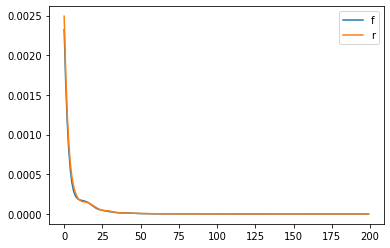

In [5]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(19,8), dpi=120)
plt.figure()
plt.plot(res1[:], label="f")
plt.plot(res2[:], label="r")
# plt.plot(res3[:], label="fr")
# plt.plot(res3[:10], label="mix")

plt.legend()
plt.show()

# print(res1[:50], res2[:50])
# print(res1[250:300])

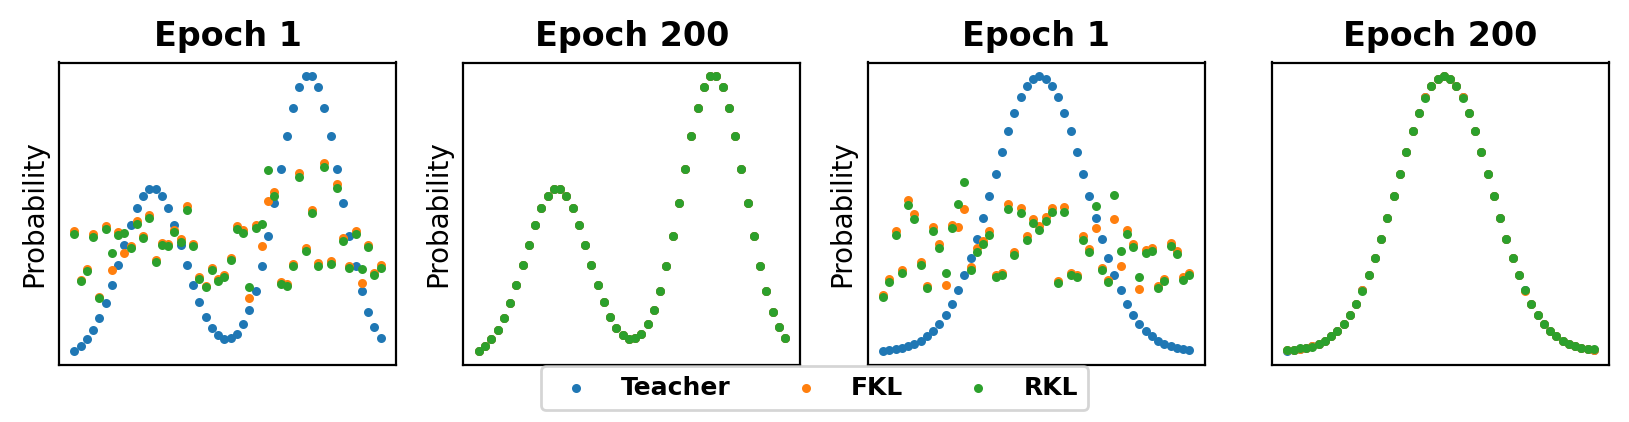

In [113]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager


X = np.arange(0,len(X), 1)
ss=20

fig, axs = plt.subplots(1,4, figsize=(10,2), dpi=200)


axs[0].scatter(X,Y,  c='#1f77b4', marker='.', s=ss)
axs[0].scatter(X,q1, c='#ff7f0e', marker='.', s=ss)
axs[0].scatter(X,q2, c='#2ca02c', marker='.', s=ss)

axs[0].set_ylabel("Probability")
# axs[0,0].set_ylim([0.0,0.035])
# axs[0].set_xlim([0,10])
axs[0].set_title("Epoch 1",weight='bold')
axs[0].set_xticks([])
axs[0].set_yticks([])
# axs[0].legend()



axs[2].scatter(X,Y1,  c='#1f77b4', marker='.', s=ss)
axs[2].scatter(X,q4, c='#ff7f0e', marker='.', s=ss)
axs[2].scatter(X,q5, c='#2ca02c', marker='.', s=ss)

axs[2].set_ylabel("Probability")
# axs[1].set_ylim([-0.001,0.03])
# axs[0,1].set_ylim([0.0,0.03])
axs[2].set_title("Epoch 1",weight='bold')
axs[2].set_xticks([])
axs[2].set_yticks([])
# axs[1].legend()

# axs[0,2].scatter(X,Y2,  c='#1f77b4', marker='.', s=ss)
# axs[0,2].scatter(X,q7, c='#ff7f0e', marker='.', s=ss)
# axs[0,2].scatter(X,q8, c='#2ca02c', marker='.', s=ss)

axs[2].set_ylabel("Probability")
# # axs[2].set_ylim([0.03,0.042])
# axs[0,2].set_xlabel(" ")
# axs[2].legend()

#
axs[1].scatter(X,Y,  c='#1f77b4', marker='.', s=ss)
axs[1].scatter(X,q11, c='#ff7f0e', marker='.', s=ss)
axs[1].scatter(X,q21, c='#2ca02c', marker='.', s=ss)

axs[1].set_ylabel("Probability")
# axs[0].set_ylim([0.0,0.01])
# axs[0].set_xlim([0,10])
# axs[1].set_xlabel("\n")
axs[1].set_title("Epoch 200",weight='bold')
axs[1].set_xticks([])
axs[1].set_yticks([])
# axs[0].legend()

axs[3].scatter(X,Y1,  c='#1f77b4', marker='.', s=ss)
axs[3].scatter(X,q41, c='#ff7f0e', marker='.', s=ss)
axs[3].scatter(X,q51, c='#2ca02c', marker='.', s=ss)

# axs[3].set_ylabel("Probability")
# axs[1].set_ylim([-0.001,0.03])
# axs[1].set_ylim([0.0,0.01])
# axs[1].set_xlabel("X")
axs[3].set_title("Epoch 200",weight='bold')
axs[3].set_xticks([])
axs[3].set_yticks([])
# axs[1].legend()

# axs[1,2].scatter(X,Y2,  c='#1f77b4', marker='.', s=ss)
# axs[1,2].scatter(X,q71, c='#ff7f0e', marker='.', s=ss)
# axs[1,2].scatter(X,q81, c='#2ca02c', marker='.', s=ss)

# axs[1,2].set_ylabel("Probability")
# # axs[2].set_ylim([0.03,0.042])
# axs[1,2].set_xlabel(" ")
# # axs[2].legend()
font = font_manager.FontProperties(weight='bold',style='normal', size=9)

# fig.legend(loc='best')
legendEntries = ("Teacher","FKL","RKL")
# set figure legend entries, number of columns, location
fig.legend(legendEntries,ncol=len(legendEntries),loc=8, prop=font)

# fig.suptitle("Epoch 50")
# plt.tight_layout()

plt.savefig("epoch_1_200_v3.pdf")
plt.show()